In [1]:
provinces = ['BKK', 'Chiangmai', 'Khonkaen', 'Rayong', 'Saraburi', 'Surat']

In [2]:
import pandas as pd

In [3]:

def format_datetime(df):
  df['date_time'] = pd.to_datetime(df['date_time'])
  df = df.set_index('date_time')
  return df

In [4]:
def format_datetime_2(df):
    df['date_time'] = pd.to_datetime(df['date_time'] , format='%d/%m/%Y %H:%M')
    df = df.set_index('date_time')
    return df

In [5]:
def replaceOutlier(df):
    # replace the outliers with their boundary
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    left_boundary = Q1 - 1.5*IQR
    right_boundary = Q3 + 1.5*IQR
    df_no_out = df 
    df_no_out[df.columns] = df.clip(left_boundary,right_boundary,axis=1)
    return df_no_out

In [6]:
def get_train_data(prov):
  df_train = pd.read_csv(prov + '/train/' + prov.lower() + '_train.csv')
  df_temp_surface = pd.read_csv(prov + '/train/' + prov.lower() + '_temp_surface.csv')
  df_weather_wind = pd.read_csv(prov + '/train/' + prov.lower() + '_weather_wind.csv')
  df_so2 = pd.read_csv(prov + '/train/' + prov.lower() + '_so2_surface_train.csv')
  df_rh = pd.read_csv(prov + '/train/' + prov.lower() + '_RH_train.csv')
  df_train = df_train.rename(columns={'Unnamed: 0':'date_time'})
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = format_datetime(df_train), format_datetime(df_temp_surface), format_datetime(df_weather_wind), format_datetime(df_so2), format_datetime(df_rh)
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.interpolate(), df_temp_surface.interpolate(), df_weather_wind.interpolate(), df_so2.interpolate(), df_rh.interpolate()
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = df_train.resample('h').ffill(), df_temp_surface.resample('h').ffill(), df_weather_wind.resample('h').ffill(), df_so2.resample('h').ffill(), df_rh.resample('h').ffill()
  df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = replaceOutlier(df_train), replaceOutlier(df_temp_surface), replaceOutlier(df_weather_wind), replaceOutlier(df_so2), replaceOutlier(df_rh)
  return df_train, df_temp_surface, df_weather_wind, df_so2, df_rh

In [7]:
def get_test_data(prov):
  df_test = pd.read_csv(f'{prov}/test/{prov.lower()}_test.csv')
  df_temp_surface_test = pd.read_csv(f'{prov}/test/{prov.lower()}_temp_surface_test.csv')
  df_weather_wind_test = pd.read_csv(f'{prov}/test/{prov.lower()}_weather_wind_test.csv')
  df_so2_test = pd.read_csv(prov + '/test/' + prov.lower() + '_so2_surface_test.csv')
  df_rh_test = pd.read_csv(prov + '/test/' + prov.lower() + '_RH_test.csv')
  df_test = df_test.rename(columns={'Unnamed: 0':'date_time'})
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = format_datetime(df_test), format_datetime_2(df_temp_surface_test), format_datetime_2(df_weather_wind_test),format_datetime(df_so2_test),format_datetime(df_rh_test)
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = df_test.interpolate(), df_temp_surface_test.interpolate(), df_weather_wind_test.interpolate(), df_so2_test.interpolate(), df_rh_test.interpolate()
  df_test, df_temp_surface_test,df_weather_wind_test, df_so2_test, df_rh_test = df_test.resample('h').ffill(), df_temp_surface_test.resample('h').ffill(), df_weather_wind_test.resample('h').ffill(), df_so2_test.resample('h').ffill(), df_rh_test.resample('h').ffill()
  df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = replaceOutlier(df_test), replaceOutlier(df_temp_surface_test), replaceOutlier(df_weather_wind_test),replaceOutlier(df_so2_test),replaceOutlier(df_rh_test)
  return df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test

In [8]:
def get_na_rows(df, col):
  return df[df[col].isna() == True].index.to_list()

In [9]:
df_train, df_temp_surface, df_weather_wind, df_so2, df_rh = get_train_data('BKK')
df_test, df_temp_surface_test, df_weather_wind_test, df_so2_test, df_rh_test = get_test_data('BKK')

C:\Users\jinnie\AppData\Local\Temp\ipykernel_19740\835860302.py:9: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df_no_out[df.columns] = df.clip(left_boundary,right_boundary,axis=1)
C:\Users\jinnie\AppData\Local\Temp\ipykernel_19740\835860302.py:9: FutureWarning: Downcasting integer-dtype results in .where is deprecated and will change in a future version. To retain the old behavior, explicitly cast the results to the desired dtype.
  df_no_out[df.columns] = df.clip(left_boundary,right_boundary,axis=1)


In [10]:
display(df_test.tail())
display(df_temp_surface_test.tail())
display(df_weather_wind_test.tail())
display(df_so2_test.tail())
display(df_rh_test.tail())

,PM2.5
date_time,
2021-07-01 19:00:00,13.0
2021-07-01 20:00:00,14.0
2021-07-01 21:00:00,14.0
2021-07-01 22:00:00,14.0
2021-07-01 23:00:00,14.0


,temp
date_time,
2021-07-01 18:00:00,32.5
2021-07-01 19:00:00,29.1
2021-07-01 20:00:00,29.1
2021-07-01 21:00:00,29.1
2021-07-01 22:00:00,29.1


,wind speed,wind dir
date_time,,
2021-07-01 18:00:00,19,240
2021-07-01 19:00:00,18,250
2021-07-01 20:00:00,18,250
2021-07-01 21:00:00,18,250
2021-07-01 22:00:00,16,245


,so2 (ug/m^3)
date_time,
2021-07-01 18:00:00,3.99
2021-07-01 19:00:00,10.72
2021-07-01 20:00:00,10.72
2021-07-01 21:00:00,10.72
2021-07-01 22:00:00,10.02


,RH
date_time,
2021-07-01 18:00:00,52.0
2021-07-01 19:00:00,70.0
2021-07-01 20:00:00,70.0
2021-07-01 21:00:00,70.0
2021-07-01 22:00:00,71.0


In [11]:
display(df_train.tail())
display(df_temp_surface.tail())
display(df_weather_wind.tail())
display(df_so2.tail())
display(df_rh.tail())

,PM2.5
date_time,
2020-06-30 19:00:00,15.0
2020-06-30 20:00:00,14.0
2020-06-30 21:00:00,17.0
2020-06-30 22:00:00,5.0
2020-06-30 23:00:00,7.0


,temp
date_time,
2020-06-30 18:00:00,32.1
2020-06-30 19:00:00,30.3
2020-06-30 20:00:00,30.3
2020-06-30 21:00:00,30.3
2020-06-30 22:00:00,29.4


,wind speed,wind dir
date_time,,
2020-06-30 18:00:00,37,255
2020-06-30 19:00:00,36,265
2020-06-30 20:00:00,36,265
2020-06-30 21:00:00,36,265
2020-06-30 22:00:00,35,270


,so2 (ug/m^3)
date_time,
2020-06-30 18:00:00,3.45
2020-06-30 19:00:00,8.96
2020-06-30 20:00:00,8.96
2020-06-30 21:00:00,8.96
2020-06-30 22:00:00,11.78


,RH
date_time,
2020-06-30 18:00:00,61.0
2020-06-30 19:00:00,69.0
2020-06-30 20:00:00,69.0
2020-06-30 21:00:00,69.0
2020-06-30 22:00:00,69.0


In [12]:
import matplotlib.pyplot as plt

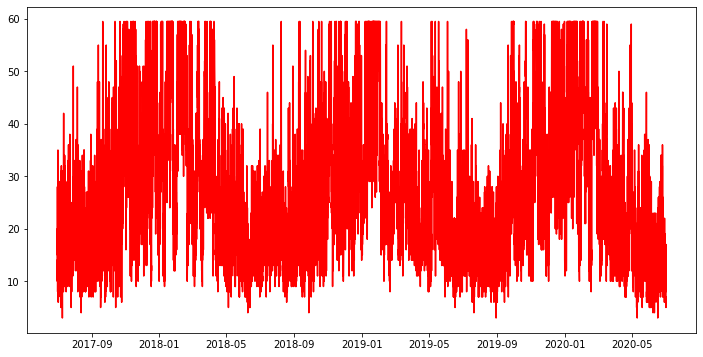

In [13]:
plt.figure(figsize=(12,6))
plt.plot(df_train,'r')

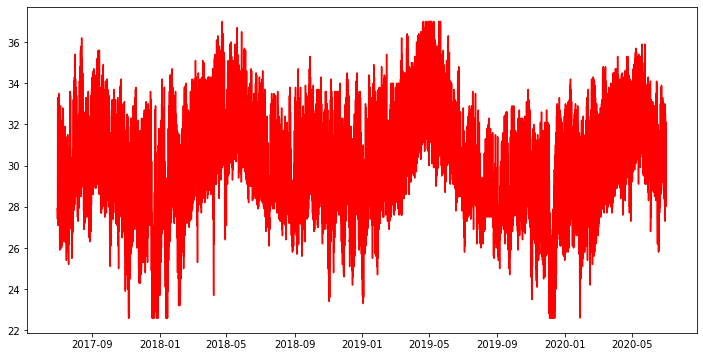

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df_temp_surface,'r')

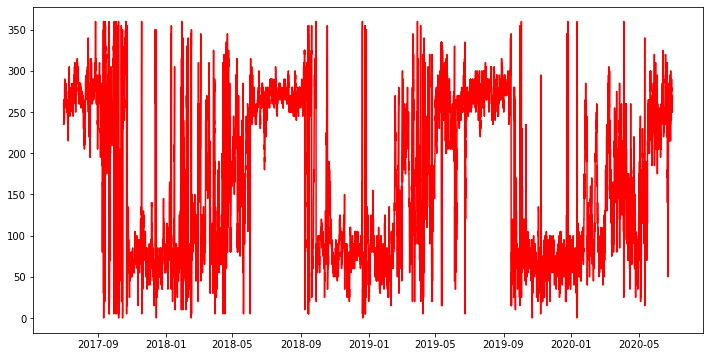

In [15]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind dir'],'r')

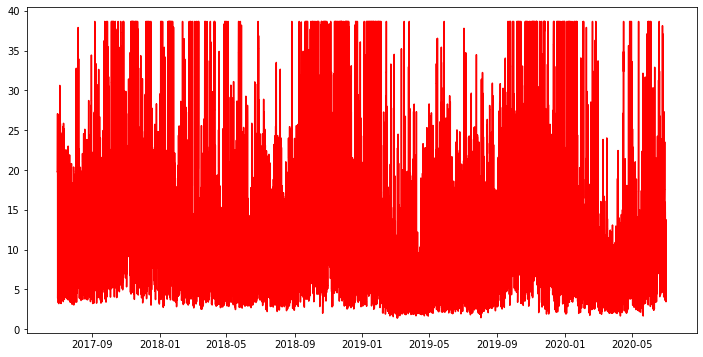

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df_so2['so2 (ug/m^3)'],'r')

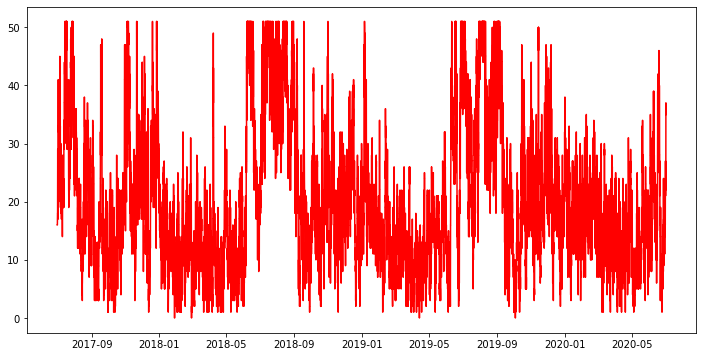

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df_weather_wind['wind speed'],'r')

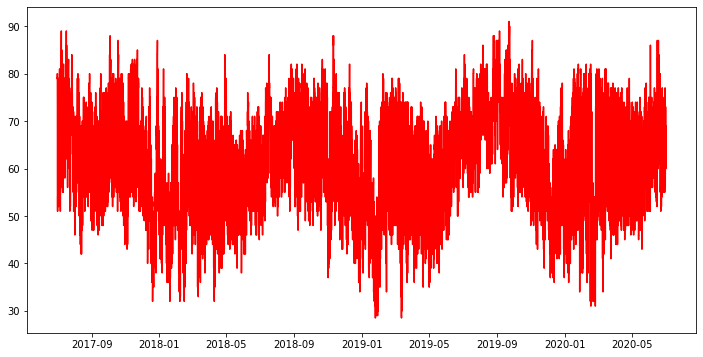

In [18]:
plt.figure(figsize=(12,6))
plt.plot(df_rh['RH'],'r')

In [19]:
df_temp_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'temp':[0]})
df_temp_0 = format_datetime(df_temp_0)
df_wind_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_0 = format_datetime(df_wind_0)
df_so2_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_0 = format_datetime(df_so2_0)
df_rh_0 = pd.DataFrame({'date_time': ['07/01/2017 00:00:00'], 'RH':[0]})
df_rh_0 = format_datetime(df_rh_0)

In [20]:
df_temp_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'temp':[df_temp_surface['temp'].iloc[26301]]})
df_temp_1 = format_datetime(df_temp_1)
df_wind_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'wind dir':[df_weather_wind['wind dir'].iloc[26301]],'wind speed':[df_weather_wind['wind speed'].iloc[26301]]})
df_wind_1 = format_datetime(df_wind_1)
df_so2_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'so2 (ug/m^3)':[df_so2['so2 (ug/m^3)'].iloc[26301]]})
df_so2_1 = format_datetime(df_so2_1)
df_rh_1 = pd.DataFrame({'date_time': ['06/30/2020 23:00:00'], 'RH':[df_rh['RH'].iloc[26301]]})
df_rh_1 = format_datetime(df_rh_1)

In [21]:
df_temp_surface = pd.concat([df_temp_0,df_temp_surface,df_temp_1])
df_weather_wind = pd.concat([df_wind_0,df_weather_wind,df_wind_1])
df_so2 = pd.concat([df_so2_0,df_so2,df_so2_1])
df_rh = pd.concat([df_rh_0,df_rh,df_rh_1])

In [22]:
data = df_train.merge(df_weather_wind,left_index=True,right_index=True)
data = data.merge(df_temp_surface,left_index=True,right_index=True)
data = data.merge(df_so2,left_index=True,right_index=True)
data = data.merge(df_rh,left_index=True,right_index=True)
data

,PM2.5,wind dir,wind speed,temp,so2 (ug/m^3),RH
date_time,,,,,,
2017-07-01 00:00:00,14.0,0,0,0.0,0.00,0.0
2017-07-01 01:00:00,10.0,260,16,27.9,19.77,79.0
2017-07-01 02:00:00,17.0,260,16,27.9,19.77,79.0
2017-07-01 03:00:00,20.0,260,16,27.9,19.77,79.0
2017-07-01 04:00:00,15.0,255,16,27.4,20.82,80.0
...,...,...,...,...,...,...
2020-06-30 19:00:00,15.0,265,36,30.3,8.96,69.0
2020-06-30 20:00:00,14.0,265,36,30.3,8.96,69.0
2020-06-30 21:00:00,17.0,265,36,30.3,8.96,69.0


In [23]:
df_temp_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'temp':[0]})
df_temp_test_0 = format_datetime(df_temp_test_0)
df_wind_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'wind dir':[0],'wind speed':[0]})
df_wind_test_0 = format_datetime(df_wind_test_0)
df_so2_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'so2 (ug/m^3)':[0]})
df_so2_test_0 = format_datetime(df_so2_test_0)
df_rh_test_0 = pd.DataFrame({'date_time': ['07/01/2020 00:00:00'], 'RH':[0]})
df_rh_test_0 = format_datetime(df_rh_test_0)

In [24]:
df_temp_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'temp':[df_temp_surface_test['temp'].iloc[8781]]})
df_temp_test_1 = format_datetime(df_temp_test_1)
df_wind_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'wind dir':[df_weather_wind_test['wind dir'].iloc[8781]],'wind speed':[df_weather_wind_test['wind speed'].iloc[8781]]})
df_wind_test_1 = format_datetime(df_wind_test_1)
df_so2_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'so2 (ug/m^3)':[df_so2_test['so2 (ug/m^3)'].iloc[8781]]})
df_so2_test_1 = format_datetime(df_so2_test_1)
df_rh_test_1 = pd.DataFrame({'date_time': ['07/01/2021 23:00:00'], 'RH':[df_rh_test['RH'].iloc[8781]]})
df_rh_test_1 = format_datetime(df_rh_test_1)

In [25]:
df_temp_surface_test = pd.concat([df_temp_test_0,df_temp_surface_test,df_temp_test_1])
df_weather_wind_test = pd.concat([df_wind_test_0,df_weather_wind_test,df_wind_test_1])
df_so2_test = pd.concat([df_so2_test_0,df_so2_test,df_so2_test_1])
df_rh_test = pd.concat([df_rh_test_0,df_rh_test,df_rh_test_1])

In [26]:
test = df_test.merge(df_temp_surface_test,left_index=True,right_index=True)
test['wind dir'] = df_weather_wind_test['wind dir'].values
test['wind speed'] = df_weather_wind_test['wind speed'].values
test = test.merge(df_so2_test,left_index=True,right_index=True)
test = test.merge(df_rh_test,left_index=True,right_index=True)
test

,PM2.5,temp,wind dir,wind speed,so2 (ug/m^3),RH
date_time,,,,,,
2020-07-01 00:00:00,9.0,0.0,0,0,0.00,0.0
2020-07-01 01:00:00,8.0,28.5,260,42,12.30,68.0
2020-07-01 02:00:00,12.0,28.5,260,42,12.30,68.0
2020-07-01 03:00:00,9.0,28.5,260,42,12.30,68.0
2020-07-01 04:00:00,8.0,28.3,270,46,14.65,69.0
...,...,...,...,...,...,...
2021-07-01 19:00:00,13.0,29.1,250,18,10.72,70.0
2021-07-01 20:00:00,14.0,29.1,250,18,10.72,70.0
2021-07-01 21:00:00,14.0,29.1,250,18,10.72,70.0


# Split data

In [27]:
#train_size, valid_size = map(lambda r: int(r*data.shape[0]), (0.7, 0.3))

In [28]:
#train, valid = data.iloc[:train_size], data.iloc[train_size:]
train = data

In [29]:
train.shape

(26304, 6)

In [30]:
#valid.shape

In [31]:
exog_columns = ['wind speed','wind dir','temp','so2 (ug/m^3)','RH']

# Fit model with exogenous data

In [32]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [33]:
from sklearn.model_selection import GridSearchCV

In [34]:
import math

In [35]:
pdq = [(0,0,1),(0,1,1),(0,2,1),(1,0,0),(1,1,0),(1,2,0),(0,0,2),]
seasonal_pdq = [(1,0,0,12),(0,0,1,12),(1,1,0,12),(0,1,1,12)]
params = [] 
params_s = [] 
aics = [] 
mses = []
cnt = 0 
for param in pdq:
  for param_seasonal in seasonal_pdq:
    mod = SARIMAX(train['PM2.5'],
    exog=train[exog_columns],
    order=param,
    seasonal_order=param_seasonal,
    freq='H',
    enforce_stationarity=False,
    enforce_invertibility=False)
    results = mod.fit()
    #test_exog = pd.concat((valid[exog_columns], test[exog_columns]), axis=0)
    pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
    pred_ci = pred.conf_int()
    params.append(param)
    params_s.append(param_seasonal)
    aics.append(results.aic)
    mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
    rmse = math.sqrt(mse) 
    mses.append(rmse)
    print('SARIMAX{}x{} - AIC:{} - MSE:{}'.format(param, param_seasonal,results.aic, mses[-1]))

SARIMAX(0, 0, 1)x(1, 0, 0, 12) - AIC:177345.21244379523 - MSE:8.918330010670648
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - AIC:179530.83840569863 - MSE:9.07501080605893
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - AIC:174849.3947987691 - MSE:9.433825345845365
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - AIC:171964.70720524064 - MSE:8.131620091017002
SARIMAX(0, 1, 1)x(1, 0, 0, 12) - AIC:157847.20354407144 - MSE:14.942135421076134
SARIMAX(0, 1, 1)x(0, 0, 1, 12) - AIC:157840.2156167426 - MSE:14.968809157346604
SARIMAX(0, 1, 1)x(1, 1, 0, 12) - AIC:166663.64316665335 - MSE:1503.8004050499278
SARIMAX(0, 1, 1)x(0, 1, 1, 12) - AIC:157219.72533166996 - MSE:57.47038877336582
SARIMAX(0, 2, 1)x(1, 0, 0, 12) - AIC:158284.37195738556 - MSE:16.687745091935017


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(0, 0, 1, 12) - AIC:158275.36054753652 - MSE:16.803097296970623


C:\Users\jinnie\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMAX(0, 2, 1)x(1, 1, 0, 12) - AIC:167472.91906866725 - MSE:2126.79780288461
SARIMAX(0, 2, 1)x(0, 1, 1, 12) - AIC:157788.45071258565 - MSE:74.60688130613852
SARIMAX(1, 0, 0)x(1, 0, 0, 12) - AIC:157570.56505111515 - MSE:9.901797820182935
SARIMAX(1, 0, 0)x(0, 0, 1, 12) - AIC:157570.59138025288 - MSE:9.902182094675766
SARIMAX(1, 0, 0)x(1, 1, 0, 12) - AIC:164585.57621763565 - MSE:11.675849305850717
SARIMAX(1, 0, 0)x(0, 1, 1, 12) - AIC:156399.26172444192 - MSE:8.380432779905469
SARIMAX(1, 1, 0)x(1, 0, 0, 12) - AIC:157907.37334415593 - MSE:15.140291418595275
SARIMAX(1, 1, 0)x(0, 0, 1, 12) - AIC:157910.11511594048 - MSE:15.163475426760858
SARIMAX(1, 1, 0)x(1, 1, 0, 12) - AIC:166824.59732731516 - MSE:1628.1429504330931
SARIMAX(1, 1, 0)x(0, 1, 1, 12) - AIC:157321.53587844697 - MSE:57.5559136849882
SARIMAX(1, 2, 0)x(1, 0, 0, 12) - AIC:170860.10206593716 - MSE:14587.900553718382
SARIMAX(1, 2, 0)x(0, 0, 1, 12) - AIC:170860.1173574357 - MSE:14593.800909670334
SARIMAX(1, 2, 0)x(1, 1, 0, 12) - AIC:

In [36]:
train.shape

(26304, 6)

In [37]:
def getBestParams(inputlist):
 
    #get the minimum value in the list
    min_value = min(inputlist)
 
    #return the index of minimum value 
    min_index=inputlist.index(min_value)
    return params[min_index], params_s[min_index]

In [38]:
bestPDQ, bestSeasonalPDQ = getBestParams(mses)

In [39]:
print(bestPDQ,bestSeasonalPDQ)

(0, 0, 2) (0, 1, 1, 12)


In [40]:
mod = SARIMAX(train['PM2.5'],
              exog=train[exog_columns],
              order=bestPDQ,
              seasonal_order=bestSeasonalPDQ,
              enforce_stationarity=False,
              enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
wind speed      -0.0446      0.009     -4.895      0.000      -0.062      -0.027
wind dir        -0.0124      0.001    -11.600      0.000      -0.014      -0.010
temp            -0.4549      0.058     -7.840      0.000      -0.569      -0.341
so2 (ug/m^3)     0.2871      0.008     33.978      0.000       0.271       0.304
RH              -0.4184      0.012    -33.883      0.000      -0.443      -0.394
ma.L1            0.7891      0.004    177.184      0.000       0.780       0.798
ma.L2            0.4298      0.005     89.593      0.000       0.420       0.439
ma.S.L12        -0.8454      0.003   -263.930      0.000      -0.852      -0.839
sigma2          32.0843      0.211    152.358      0.000      31.672      32.497


# Predict on test

In [41]:
pred = results.get_prediction(start=test.index[0], end=test.index[-1], exog=test[exog_columns], dynamic=False)
pred_ci = pred.conf_int()

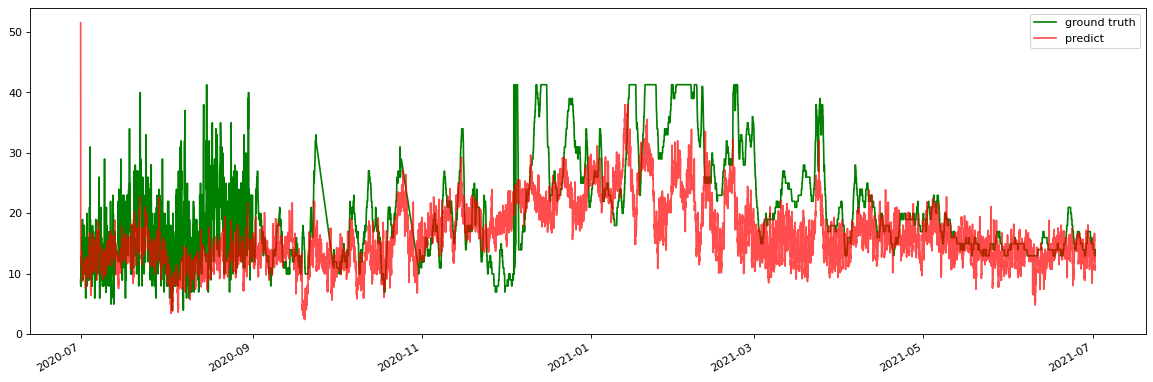

In [42]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(18, 6), dpi=80, facecolor='w', edgecolor='k')
plt.plot(test['PM2.5'], color='g',label='ground truth')
pred.predicted_mean.plot(alpha=.7, color='r',label='predict')
plt.legend(loc="upper right")

plt.show()

In [43]:
import math

In [44]:
mse = mean_squared_error(test['PM2.5'], pred.predicted_mean)
rmse = math.sqrt(mse)
print('Test on SARIMAX with RMSE: %f' % (rmse, ))

Test on SARIMAX with RMSE: 7.933686


In [45]:
pred.predicted_mean.to_csv('BKK.csv', index=True)